## 라이브러리

In [1]:
# 시각화
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

# 크롤링
import requests
from bs4 import BeautifulSoup
import time

## 중앙 제공회 데이터(라벨링 전) import

In [2]:
#combined_data는 연도 별 데이터 합친 것
test = pd.read_csv('combined_data.csv', low_memory=False)

## 데이터 Labeling

#### 각 사고부위, 사고매개물, 사고형태에 따른 점수 매핑하였으며, 각 행별 점수를 계산함. 이후 라벨링 함수를 정의해 '중상'과 '경상' 라벨링을 추가함

In [3]:
# count_data = test['평균점수'].value_counts()

score_mapping = {
    '사고부위': {'발': 1, '손': 1, '다리': 2, '팔': 2, '치아(구강)': 3, '흉복부': 3, '기타': 3, '복합부위': 2, '머리(두부)': 3},
    '사고매개물': { '가구(책상/의자/책장/탁자/침대 등)': 2, '건물(문/창문/바닥/벽 등)': 2, '기계 도구류(기계선반, 재봉틀기계 등)': 3, '날카로운 물건(칼/가위/송곳 등)': 3, '열(불/뜨거운 물 등)': 3, '운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)': 1, '운송용구(차/자전거/선박/항공기 등)': 3, '자연(사람/동물/식물 등)': 2, '기타': 2},
    '사고형태': {'물리적힘 노출': 1, '사람과의 충돌': 2, '낙상-넘어짐': 2, '낙상-떨어짐': 3, '낙상-미끄러짐': 2, '염좌·삐임 등 신체 충격': 2, '기타': 2}
}

test['평균점수'] = (test['사고부위'].map(score_mapping['사고부위']) +
                          test['사고매개물'].map(score_mapping['사고매개물']) +
                          test['사고형태'].map(score_mapping['사고형태'])) / 3
def label(row):
    if row['평균점수'] >= 2:
        return '중상'
    else:
        return '경상'

test['상태'] = test.apply(label, axis=1)

print(test)

# test.to_csv('label.csv', index=False)

              구분   학교급  지역         교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일  \
0       A0000001  기타학교  경기      경기도교육청   사립  일반학생     여   2학년  2018-12-28   
1       A0000002  초등학교  경기   광주하남교육지원청   공립  일반학생     여   2학년  2018-12-27   
2       A0000003  초등학교  경기     용인교육지원청   공립  일반학생     남   6학년  2018-12-28   
3       A0000004   중학교  경기  구리남양주교육지원청   공립  일반학생     남   1학년  2018-11-22   
4       A0000005   중학교  경기   광주하남교육지원청   공립  일반학생     여   3학년  2018-12-24   
...          ...   ...  ..         ...  ...   ...   ...   ...         ...   
616382  E0193173   중학교  제주   서귀포시교육지원청   공립  일반학생     여   2학년  2023-12-11   
616383  E0193174   중학교  제주    제주시교육지원청   공립  일반학생     남   1학년  2023-12-08   
616384  E0193175   중학교  제주    제주시교육지원청   공립  일반학생     여   3학년  2023-12-04   
616385  E0193176   중학교  제주    제주시교육지원청   공립  일반학생     남   1학년  2023-12-13   
616386  E0193177   중학교  제주    제주시교육지원청   공립  일반학생     남   1학년  2023-11-30   

       사고발생요일 사고발생시각         사고시간  사고장소    사고부위     사고형태    사고당시활동  \
0    

## 필요 데이터 크롤링

#### 전문강사 인력풀 및 개설강의 목록에 대해 필요한 데이터 크롤링을 위한 크롤링 코드

#### 1. 헤더 설정(웹 요청 시 사용될 사용자 에이전트 정의)
#### 2. URL 템플릿 설정(여러 페이지를 가져오기 위해 설정)
#### 3. 페이지 데이터 수집 함수 정의(get_page_data)
#### 4. 페이지 수('num_pages') 및 전체 데이터 리스트('all_data') 설정

In [4]:
# --------------------------- 운영체제에 따라 상이하므로 주석처리 --------------------------- #
## USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
# --------------------------- 운영체제에 따라 상이하므로 주석처리 --------------------------- #
# HEADERS = {'user-agent': USER_AGENT}

# # URL 템플릿 설정
# URL_BASE = 'https://lecture.schoolsafe.kr/illyeokpull/lecturer?page={}'

# def get_page_data(url):
#     response = requests.get(url, headers=HEADERS)
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.content, 'lxml')
#         rows = soup.select('div.comTable.vertical.tac table tbody tr')
#         page_data = []
#         for row in rows:
#             cols = row.find_all('td')
#             page_data.append({
#                 '강사인정일': cols[0].get_text(strip=True),
#                 '지역 (시군구)': cols[1].get_text(strip=True),
#                 '전문분야': cols[7].get_text(strip=True)
#             })
#         return page_data
#     else:
#         print(f"Failed to retrieve data: Status Code {response.status_code}")
#         return []

# num_pages = 17
# all_data = []

# for page_num in range(1, num_pages + 1):
#     time.sleep(1) 
#     url = URL_BASE.format(page_num)
#     page_data = get_page_data(url)
#     all_data.extend(page_data)
#     print(f"Page {page_num} scraped successfully.")

# df = pd.DataFrame(all_data)
# print(df)

# df.to_csv('인력풀.csv', index=False)

In [5]:
# --------------------------- 운영체제에 따라 상이하므로 주석처리 --------------------------- #
## USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
# --------------------------- 운영체제에 따라 상이하므로 주석처리 --------------------------- #
# HEADERS = {'user-agent': USER_AGENT}

# URL_BASE = 'https://lecture.schoolsafe.kr/current/lecture?page={}'
# def get_clean_text(element):
#     """해당 HTML element의 텍스트를 반환하되, <span>을 제외한 텍스트만 반환합니다."""
#     for span in element.find_all('span'):
#         span.extract()  # <span> 요소를 제거합니다.
#     return element.get_text(strip=True)

# def get_page_data(url):
#     response = requests.get(url, headers=HEADERS)
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.content, 'lxml')
#         rows = soup.select('div.comTable.vertical.tac table tbody tr')
#         page_data = []
#         for row in rows:
#             cols = row.find_all('td')
#             page_data.append({
#                 '등록일 (수정일)': get_clean_text(cols[0]),
#                 '기관명': cols[1].get_text(strip=True),
#                 '지역 (시군구)': cols[2].get_text(strip=True),
#                 '강의명': cols[3].get_text(strip=True),
#                 '강의 대상': cols[4].get_text(strip=True),
#                 '강의일 (시간)': get_clean_text(cols[5]),
#                 '신청 마감일': cols[6].get_text(strip=True)
#             })
#         return page_data
#     else:
#         print(f"Failed to retrieve data: Status Code {response.status_code}")
#         return []

# num_pages = 17
# all_data = []

# for page_num in range(1, num_pages + 1):
#     time.sleep(1) 
#     url = URL_BASE.format(page_num)
#     page_data = get_page_data(url)
#     all_data.extend(page_data)
#     print(f"Page {page_num} scraped successfully.")

# df = pd.DataFrame(all_data)
# print(df)

# df.to_csv('개설강의.csv', index=False)

## 키워드 대분류 및 매핑

In [6]:
keywords = {
    "서울": "서울",
    "경기": "경기",
    "대전": "대전",
    "대구": "대구",
    "강원": "강원",
    "부산": "부산",
    "인천": "인천",
    "광주": "광주",
    "울산": "울산",
    "충청남도": "충남",
    "충청북도": "충북",
    "전라남도": "전남",
    "전라북도": "전북",
    "경상남도": "경남",
    "경상북도": "경북",
    "충남": "충남",
    "충북": "충북",
    "전남": "전남",
    "전북": "전북",
    "경남": "경남",
    "경북": "경북",
    "세종": "세종",
    "제주": "제주",

}

def label_data(text):
    if isinstance(text, float):
        text = str(text)
    labels = [label for keyword, label in keywords.items() if keyword in text]
    return ', '.join(labels)

sheet_name = 'Sheet1'

df = pd.read_excel('인력풀.xlsx', sheet_name=sheet_name)

text_column = '지역 (시군구)'

df['지역 분류'] = df[text_column].apply(label_data)

df.to_excel('인력풀 지역 라벨링.xlsx', index=False)

## 중앙제공회(라벨링 처리 이후) 데이터 import

In [7]:
df = pd.read_csv("labeling.csv")

## 연도별 사건 사고 발생 빈도

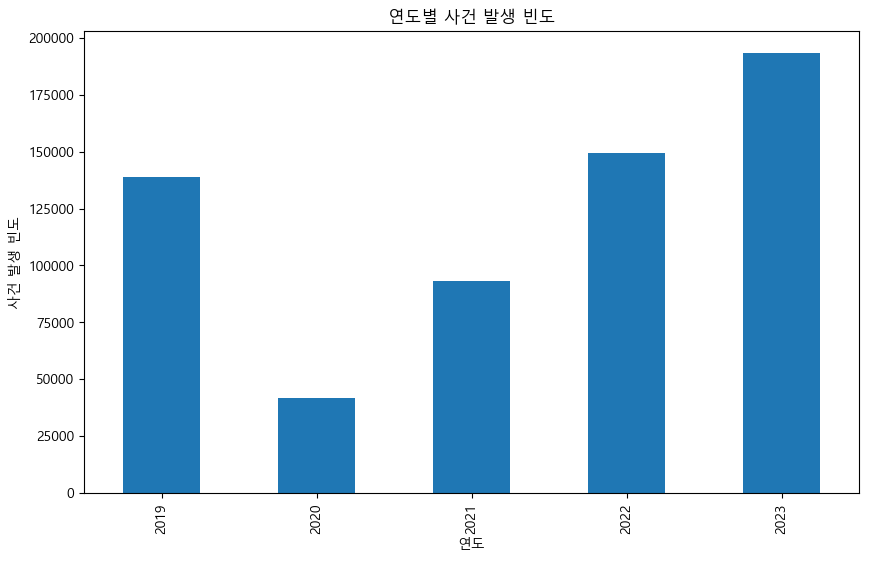

In [8]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('연도')
plt.ylabel('사건 발생 빈도')
plt.title('연도별 사건 발생 빈도')
plt.show()

## 성별별 분석

In [9]:
columns = ['사고자성별', '사고부위', '상태']
df = df[columns]

df['사고자성별'] = df['사고자성별'].apply(lambda x: '남' if x == '남' else '여')
df['상태'] = df['상태'].apply(lambda x: '경상' if '경상' in x else '중상')

injury_counts = df.groupby(['사고부위', '사고자성별', '상태']).size().reset_index(name='빈도')

injury_counts.head()

,사고부위,사고자성별,상태,빈도
0,기타,남,경상,1631
1,기타,남,중상,7881
2,기타,여,경상,658
3,기타,여,중상,3543
4,다리,남,경상,17578


In [10]:
male_minor_injuries = injury_counts[(injury_counts['사고자성별'] == '남') & (injury_counts['상태'] == '경상')]
male_major_injuries = injury_counts[(injury_counts['사고자성별'] == '남') & (injury_counts['상태'] == '중상')]
female_minor_injuries = injury_counts[(injury_counts['사고자성별'] == '여') & (injury_counts['상태'] == '경상')]
female_major_injuries = injury_counts[(injury_counts['사고자성별'] == '여') & (injury_counts['상태'] == '중상')]

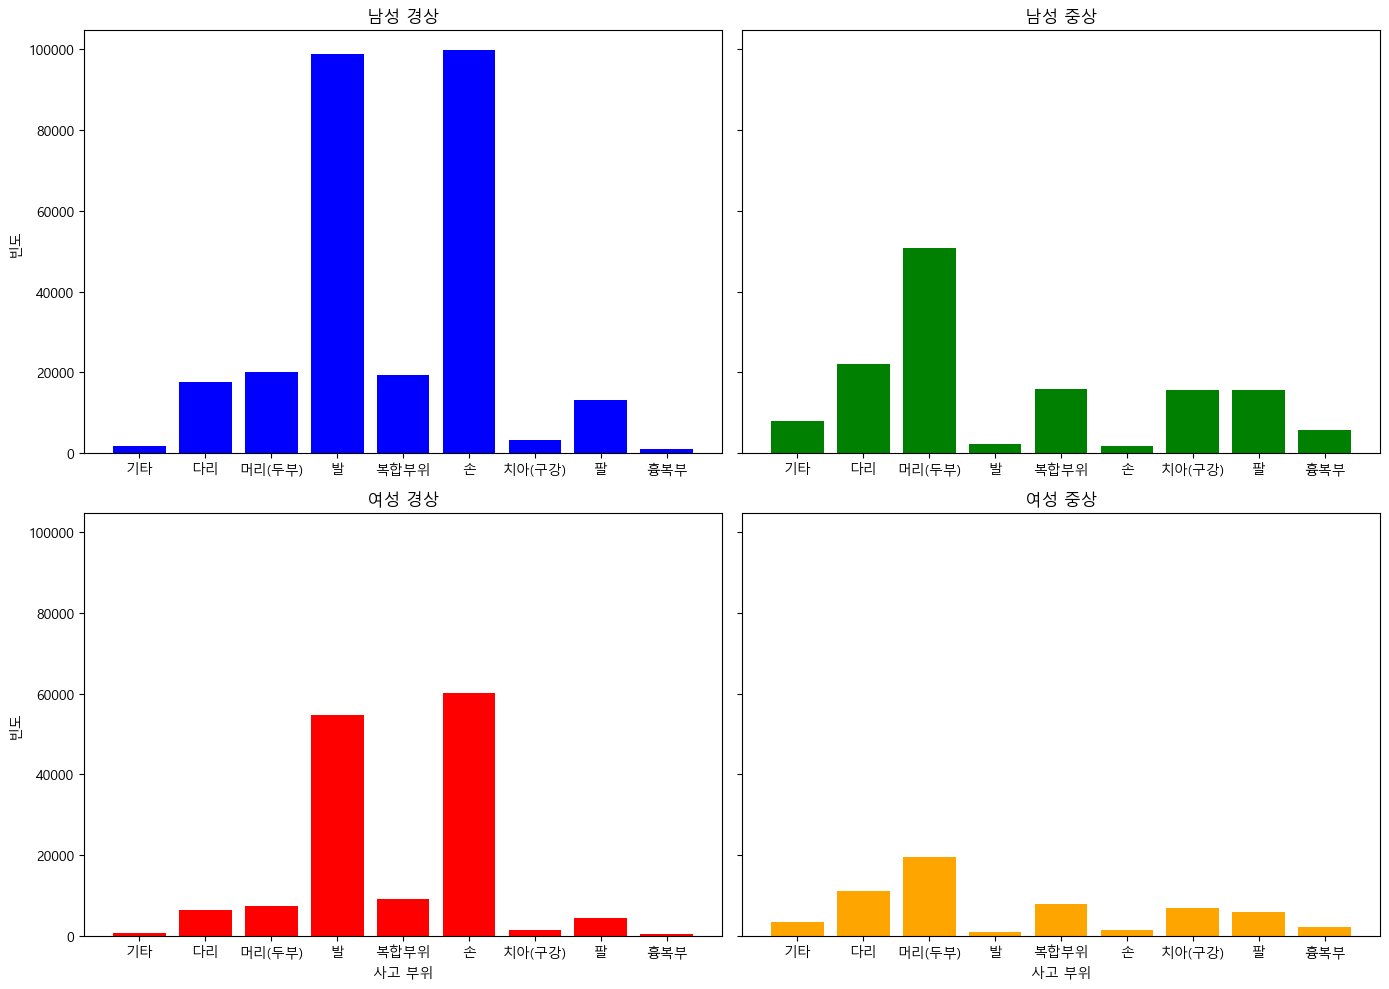

In [11]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

axes[0, 0].bar(male_minor_injuries['사고부위'], male_minor_injuries['빈도'], color='blue')
axes[0, 0].set_title('남성 경상')
axes[0, 0].set_ylabel('빈도')

axes[0, 1].bar(male_major_injuries['사고부위'], male_major_injuries['빈도'], color='green')
axes[0, 1].set_title('남성 중상')

axes[1, 0].bar(female_minor_injuries['사고부위'], female_minor_injuries['빈도'], color='red')
axes[1, 0].set_title('여성 경상')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].set_xlabel('사고 부위')

axes[1, 1].bar(female_major_injuries['사고부위'], female_major_injuries['빈도'], color='orange')
axes[1, 1].set_title('여성 중상')
axes[1, 1].set_xlabel('사고 부위')

plt.tight_layout()
plt.show()

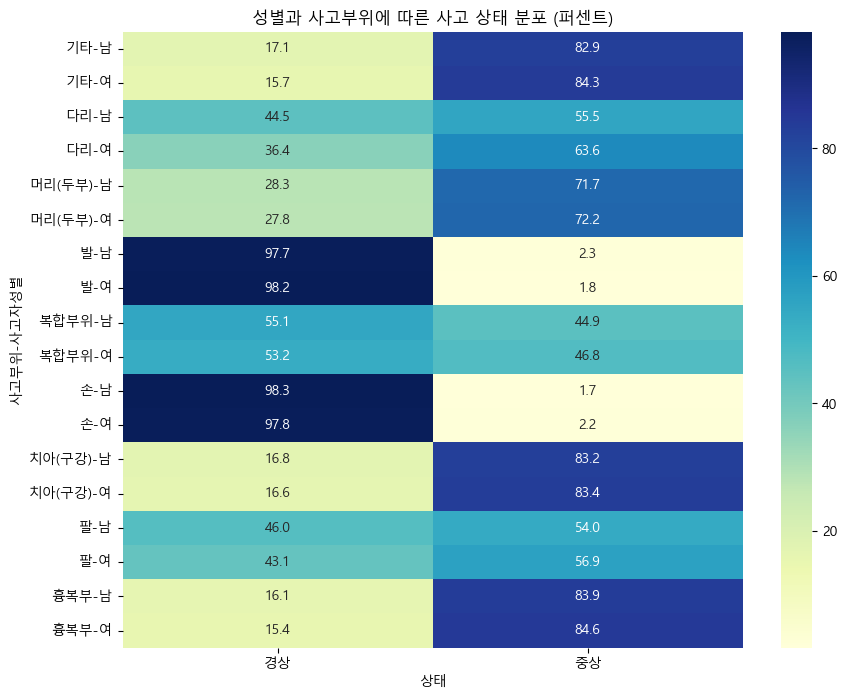

In [12]:
pivot_table = injury_counts.pivot_table(index=['사고부위', '사고자성별'], columns='상태', values='빈도', aggfunc='sum', fill_value=0)

percentage_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(percentage_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('성별과 사고부위에 따른 사고 상태 분포 (퍼센트)')
plt.show()

## 계절별 분석

In [13]:
df = pd.read_csv("labeling.csv")

df['사고발생일'] = pd.to_datetime(df['사고발생일'], format='%Y-%m-%d', errors='coerce')

def season_selector(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['계절'] = df['사고발생일'].dt.month.apply(season_selector)

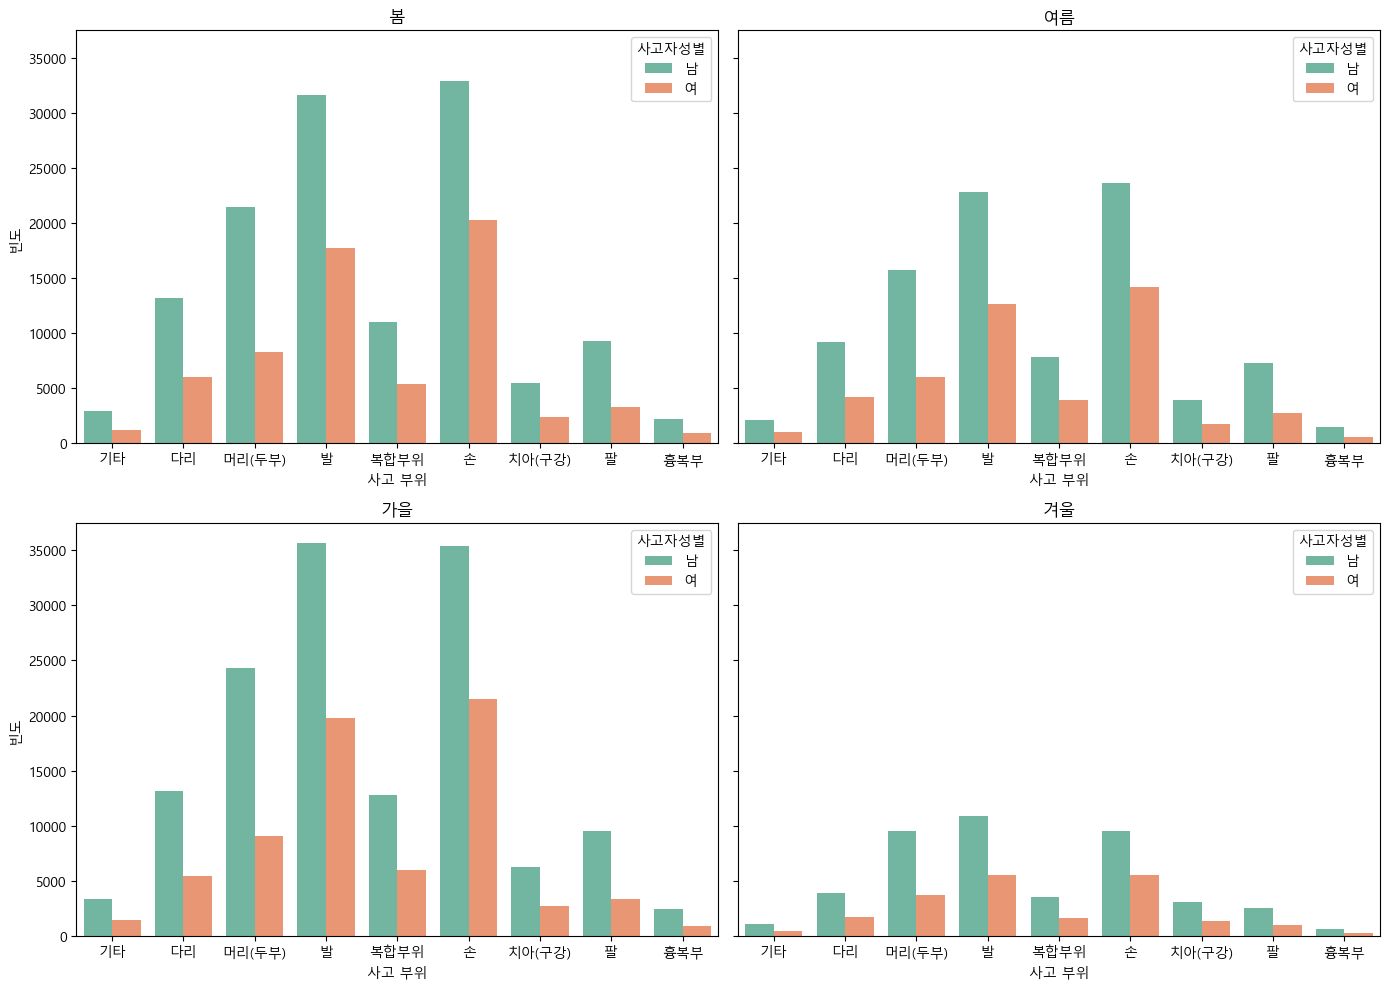

In [14]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

spring_data = df[df['계절'] == '봄']
summer_data = df[df['계절'] == '여름']
autumn_data = df[df['계절'] == '가을']
winter_data = df[df['계절'] == '겨울']

def season_visualizing(data, season_name, ax):
    injury_counts = data.groupby(['사고부위', '사고자성별']).size().reset_index(name='빈도')

    sns.barplot(x='사고부위', y='빈도', hue='사고자성별', data=injury_counts, ax=ax, palette='Set2')
    ax.set_title(f'{season_name}')
    ax.set_xlabel('사고 부위')
    ax.set_ylabel('빈도')
    ax.legend(title='사고자성별')

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

season_visualizing(spring_data, '봄', axes[0, 0])
season_visualizing(summer_data, '여름', axes[0, 1])
season_visualizing(autumn_data, '가을', axes[1, 0])
season_visualizing(winter_data, '겨울', axes[1, 1])

plt.tight_layout()
plt.show()

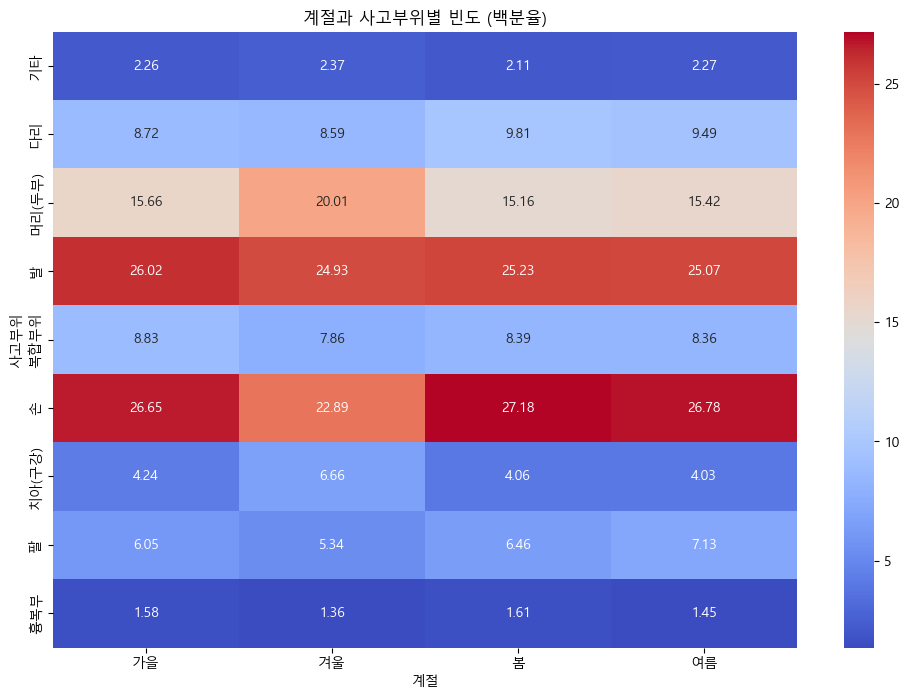

In [15]:
df['빈도'] = 1
df_grouped = df.groupby(['계절', '사고부위']).size().reset_index(name='빈도')

pivot_table = df_grouped.pivot_table(values='빈도', index='사고부위', columns='계절', fill_value=0)

pivot_table_per = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100

# 백분율로 표시된 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_per, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('계절과 사고부위별 빈도 (백분율)')
plt.xlabel('계절')
plt.ylabel('사고부위')
plt.show()

## 지역별 분석

In [16]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [17]:
df = pd.read_csv('labeling.csv')
pop = pd.read_csv('인구현황.csv', encoding='cp949')

In [18]:
region_counts = df['지역'].value_counts()
region_counts

지역
경기    183461
서울     97310
경남     38877
부산     34051
인천     29072
대구     28475
경북     25298
충남     25256
전북     24844
강원     22589
광주     18562
대전     18235
충북     17185
울산     16687
전남     14296
제주     13189
세종      9000
Name: count, dtype: int64

In [19]:
pop['행정구역'] = pop['행정구역'].str.replace('충청북도', '충북')
pop['행정구역'] = pop['행정구역'].str.replace('충청남도', '충남')
pop['행정구역'] = pop['행정구역'].str.replace('전라북도', '전북')
pop['행정구역'] = pop['행정구역'].str.replace('전라남도', '전남')
pop['행정구역'] = pop['행정구역'].str.replace('경상북도', '경북')
pop['행정구역'] = pop['행정구역'].str.replace('경상남도', '경남')

pop['행정구역'] = pop['행정구역'].str.replace('특별시', '')
pop['행정구역'] = pop['행정구역'].str.replace('광역시', '')
pop['행정구역'] = pop['행정구역'].str.replace('특별자치도', '')
pop['행정구역'] = pop['행정구역'].str.replace('특별자치시', '')
pop['행정구역'] = pop['행정구역'].str.replace('도', '')

pop['행정구역'] = pop['행정구역'].apply(lambda x: x.split(' ')[0])
pop = pop[['행정구역', '2022년_계_총인구수']]

region = pd.merge(region_counts, pop, left_on = '지역', right_on = '행정구역', how = 'left')

region.rename(columns={
    'count': '안전사고 횟수',
    '2022년_계_총인구수': '지역별 인구수'
}, inplace=True)


region['지역별 사고율'] = region['안전사고 횟수'] / region['지역별 인구수'].str.replace(',', '').astype(int)
region

,안전사고 횟수,행정구역,지역별 인구수,지역별 사고율
0,183461,경기,"13,589,432",0.013500
1,97310,서울,"9,428,372",0.010321
2,38877,경남,"3,280,493",0.011851
3,34051,부산,"3,317,812",0.010263
4,29072,인천,"2,967,314",0.009797
5,28475,대구,"2,363,691",0.012047
6,25298,경북,"2,600,492",0.009728
7,25256,충남,"2,123,037",0.011896
8,24844,전북,"1,769,607",0.014039
9,22589,강원,"1,536,498",0.014702


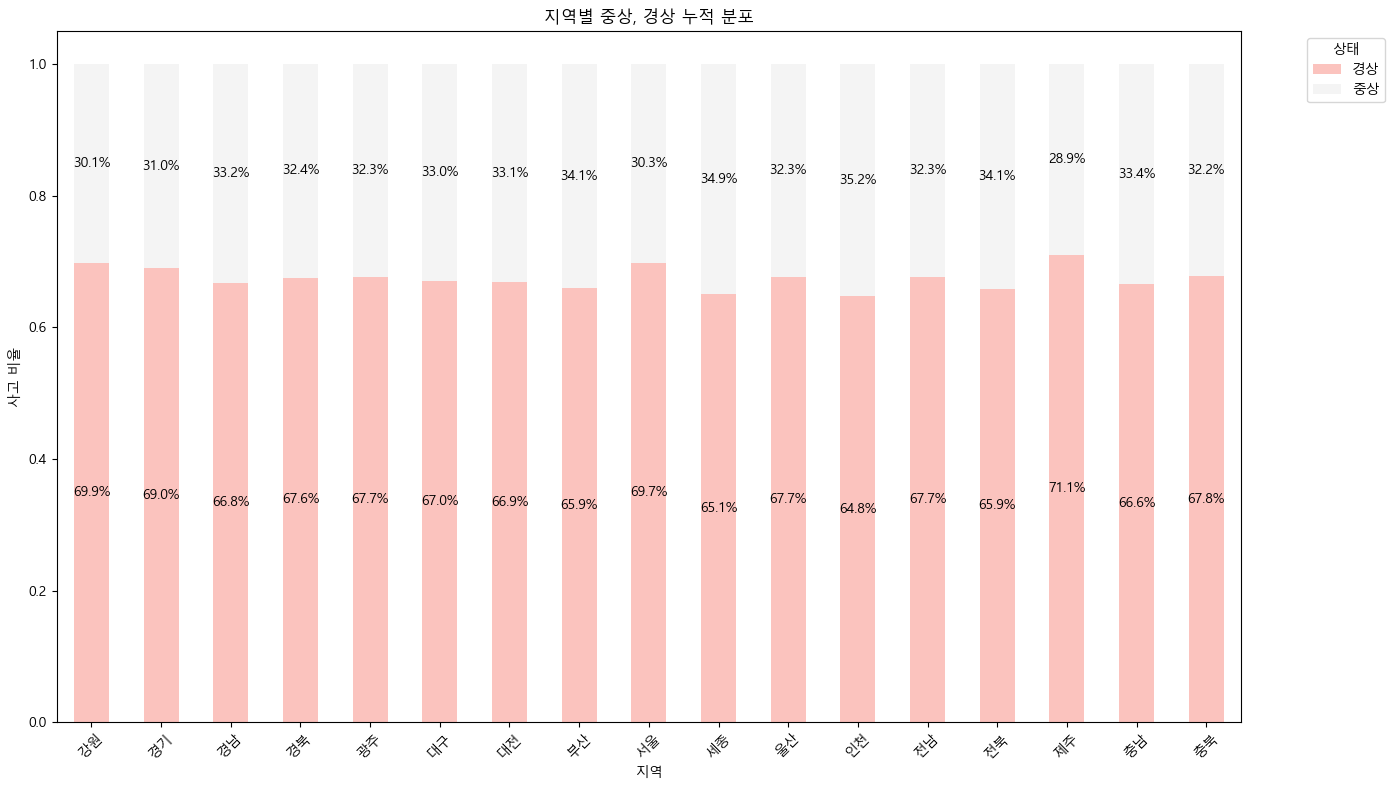

In [20]:
accident_distribution = df.groupby(['지역', '상태']).size().unstack(fill_value=0)

accident_distribution_normalized = accident_distribution.div(accident_distribution.sum(axis=1), axis=0)

ax = accident_distribution_normalized.plot(kind='bar', stacked=True, figsize=(14, 8), alpha=0.8, colormap='Pastel1')
plt.title('지역별 중상, 경상 누적 분포')
plt.xlabel('지역')
plt.ylabel('사고 비율')
plt.xticks(rotation=45)
plt.legend(title='상태', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    labels = [f'{v*100:.1f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

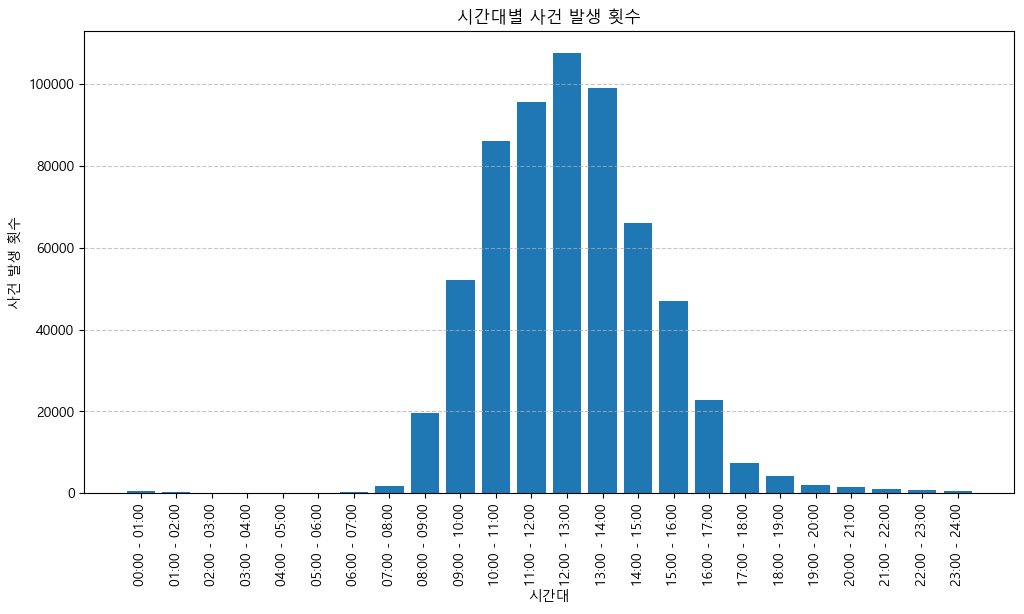

In [21]:
df['사고발생시각'] = pd.to_datetime(df['사고발생시각'], format='%H:%M')

def categorize_time_filter(x):
    hour = x.hour
    minute = x.minute
    return f'{hour:02d}:00 - {hour+1:02d}:00'

df['사고시간대_1시간'] = df['사고발생시각'].apply(categorize_time_filter)

incident_time = df['사고시간대_1시간'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(incident_time.index, incident_time.values)
plt.xlabel('시간대')
plt.ylabel('사건 발생 횟수')
plt.title('시간대별 사건 발생 횟수')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

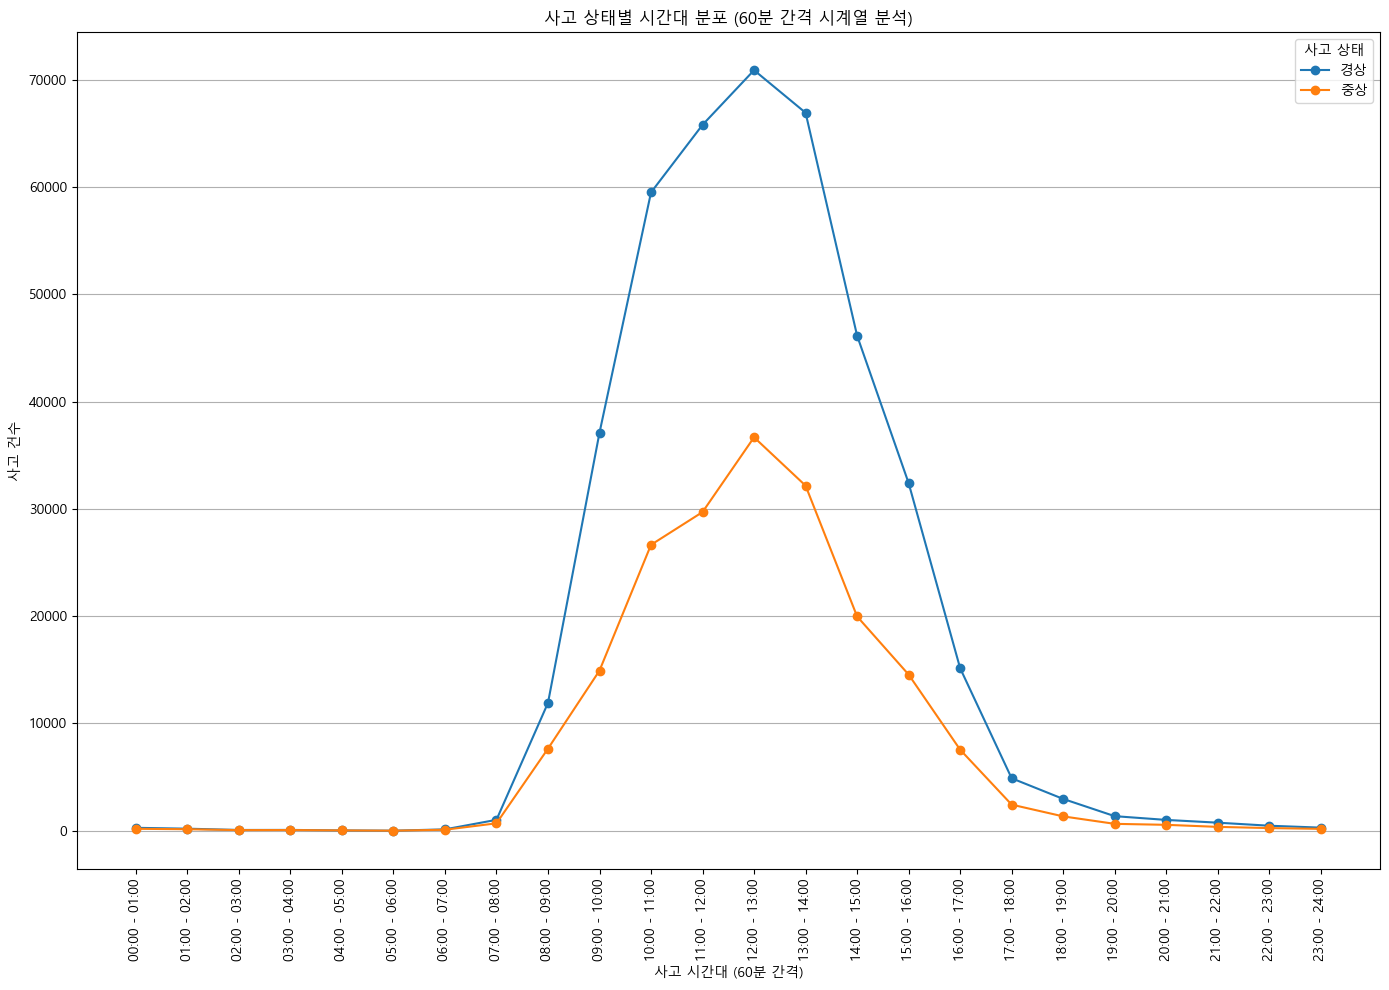

In [22]:
time_series_data = df.groupby(['사고시간대_1시간', '상태']).size().unstack(fill_value=0)


time_series_data = time_series_data.sort_index()

#시각화
plt.figure(figsize=(14, 10))

for state in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[state], marker='o', label=state)

plt.title('사고 상태별 시간대 분포 (60분 간격 시계열 분석)')
plt.xlabel('사고 시간대 (60분 간격)')
plt.ylabel('사고 건수')
plt.legend(title='사고 상태')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Only horizontal grid lines
plt.tight_layout()
plt.show()


## 사고부위별 분석

C:\Users\sande\AppData\Local\Temp\ipykernel_11844\1361185007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='사고부위', y='사고수', data=accident_counts_by_part, palette='Set2')


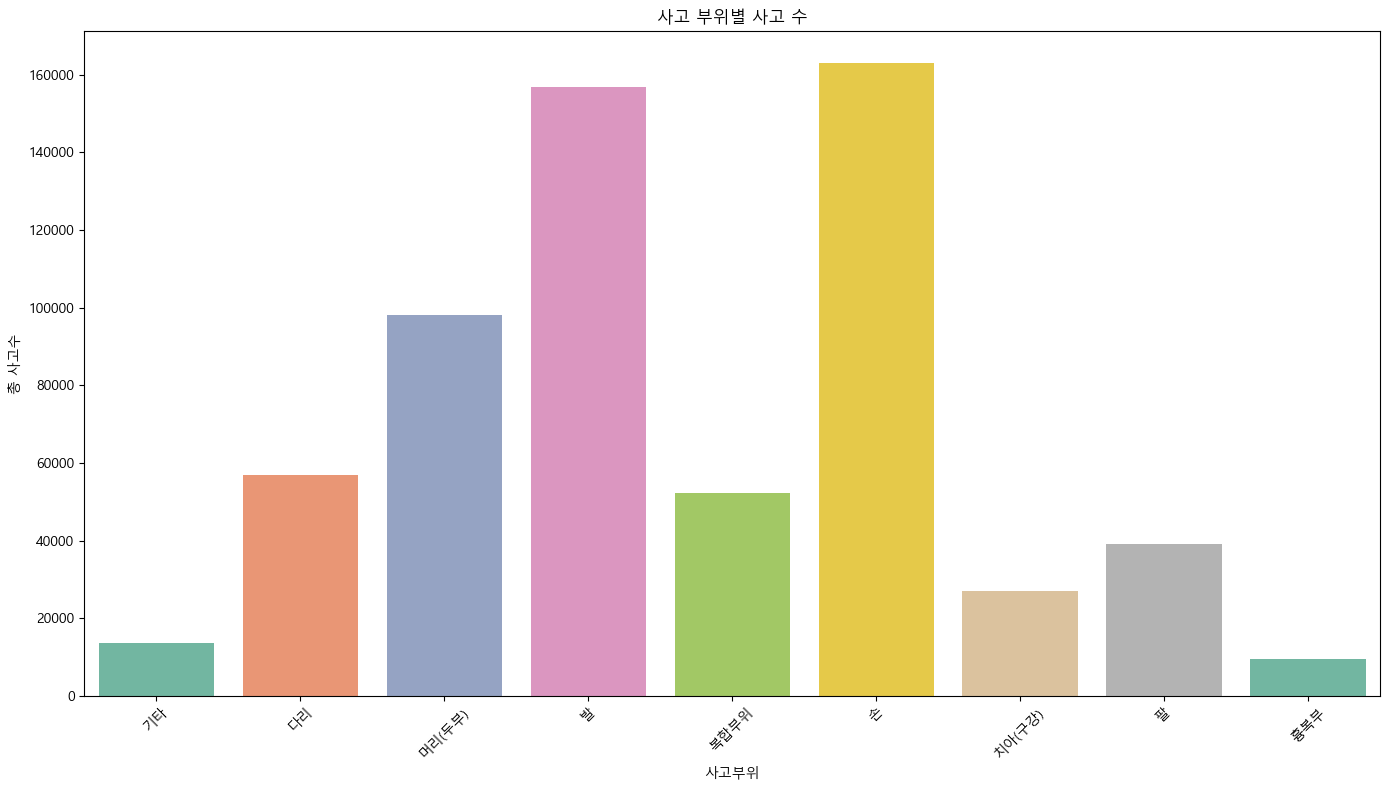

In [23]:
accident_counts_by_part = df.groupby('사고부위').size().reset_index(name='사고수')

plt.figure(figsize=(14, 8))
sns.barplot(x='사고부위', y='사고수', data=accident_counts_by_part, palette='Set2')
plt.title('사고 부위별 사고 수')
plt.xlabel('사고부위')
plt.ylabel('총 사고수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df = pd.read_csv("labeling.csv")

In [25]:
accident_counts = df.groupby(['사고시간', '사고부위']).size().reset_index(name='건수')

C:\Users\sande\AppData\Local\Temp\ipykernel_11844\2320987745.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_accidents['사고시간'] + " / " + top_accidents['사고부위'], rotation=0, fontsize=9)


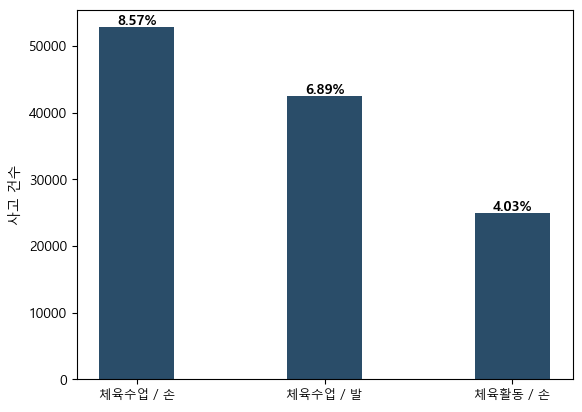

In [26]:
total_accidents = accident_counts['건수'].sum()

top_accidents = accident_counts.sort_values(by='건수', ascending=False).head(3)

top_accidents['Percentage'] = (top_accidents['건수'] / total_accidents) * 100


fig, ax = plt.subplots()
bars = ax.bar(top_accidents['사고시간'] + " / " + top_accidents['사고부위'], top_accidents['건수'], color='#2a4d69', width=0.4)  # 막대 너비 조절
ax.set_ylabel('사고 건수')

for bar, perc in zip(bars, top_accidents['Percentage']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{perc:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

ax.set_xticklabels(top_accidents['사고시간'] + " / " + top_accidents['사고부위'], rotation=0, fontsize=9)

plt.show()

## 사고장소별 분석

C:\Users\sande\AppData\Local\Temp\ipykernel_11844\2600120757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='사고장소', y='사고수', data=accident_counts_by_location, palette='Set2')


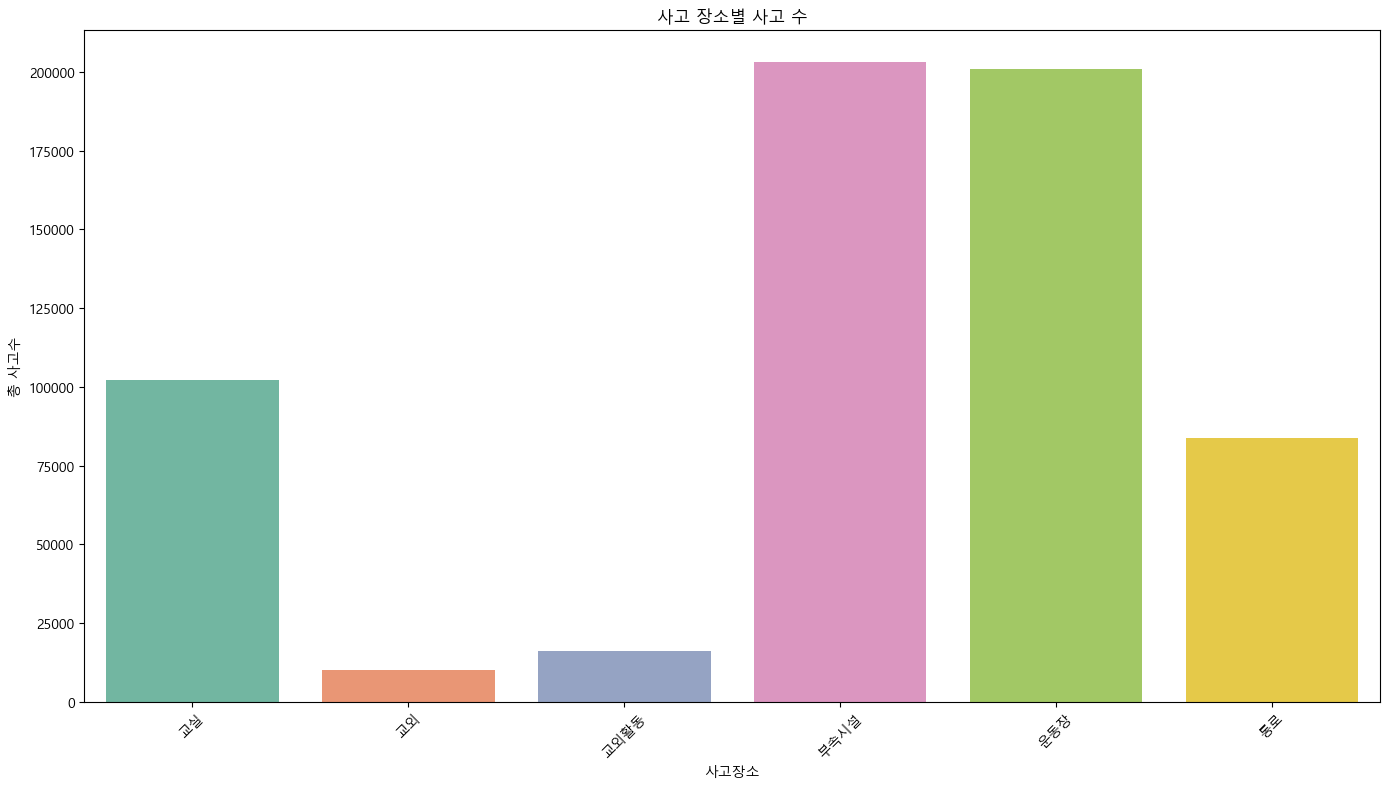

In [27]:
accident_counts_by_location = df.groupby('사고장소').size().reset_index(name='사고수')

plt.figure(figsize=(14, 8))
sns.barplot(x='사고장소', y='사고수', data=accident_counts_by_location, palette='Set2')
plt.title('사고 장소별 사고 수')
plt.xlabel('사고장소')
plt.ylabel('총 사고수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

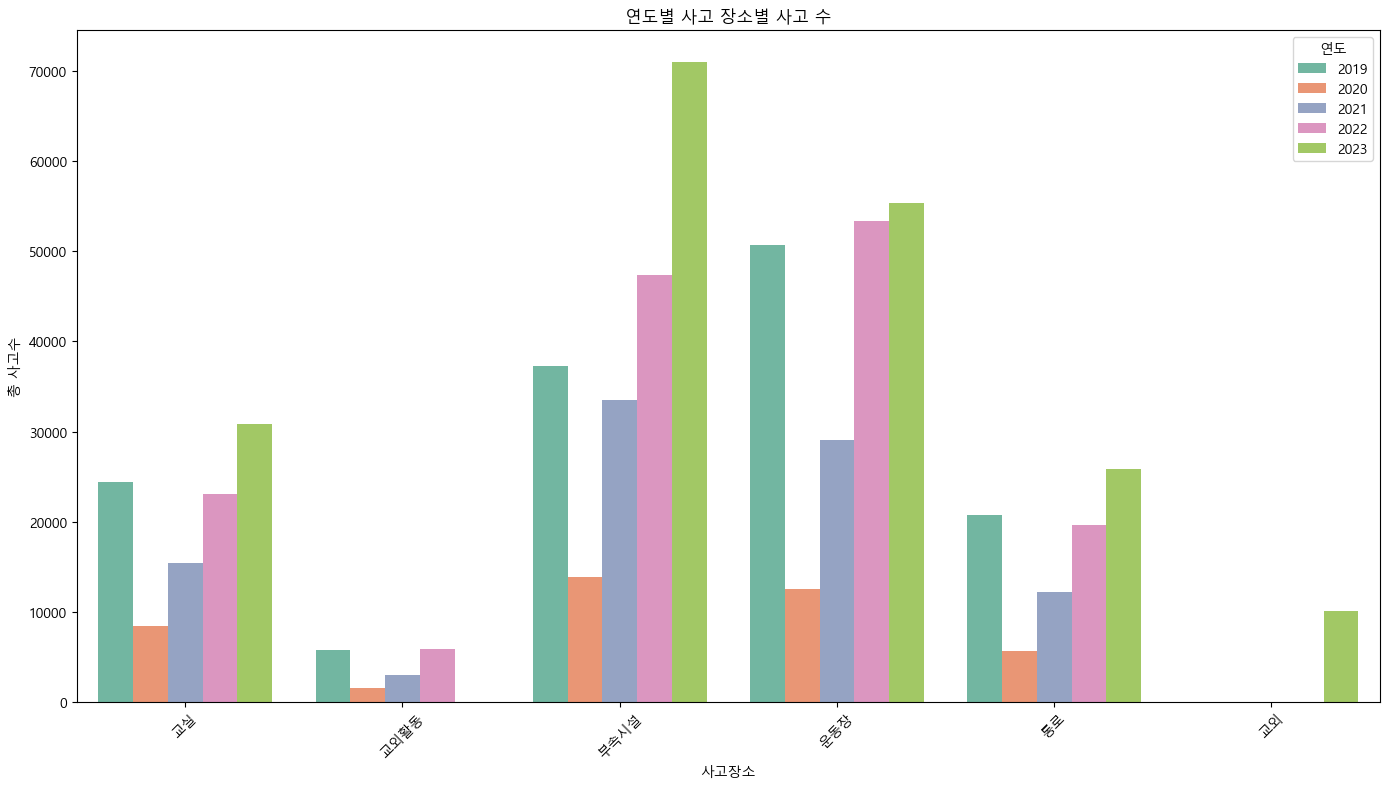

In [28]:
accident_counts = df.groupby(['year', '사고장소']).size().reset_index(name='사고수')

plt.figure(figsize=(14, 8))
sns.barplot(x='사고장소', y='사고수', hue='year', data=accident_counts, palette='Set2')
plt.title('연도별 사고 장소별 사고 수')
plt.xlabel('사고장소')
plt.ylabel('총 사고수')
plt.legend(title='연도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sande\AppData\Local\Temp\ipykernel_11844\4246697753.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_location_part['사고장소'] + " / " + top_location_part['사고부위'], rotation=0, fontsize=9)


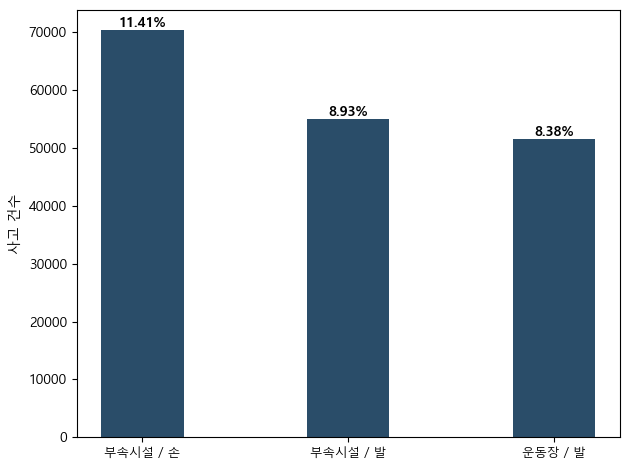

In [29]:
location_part_counts = df.groupby(['사고장소', '사고부위']).size().reset_index(name='건수')

total_accidents = location_part_counts['건수'].sum()

top_location_part = location_part_counts.sort_values(by='건수', ascending=False).head(3)

top_location_part['Percentage'] = (top_location_part['건수'] / total_accidents) * 100

fig, ax = plt.subplots()
bars = ax.bar(top_location_part['사고장소'] + " / " + top_location_part['사고부위'], top_location_part['건수'], color='#2a4d69', width=0.4)
ax.set_ylabel('사고 건수')

for bar, perc in zip(bars, top_location_part['Percentage']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{perc:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

ax.set_xticklabels(top_location_part['사고장소'] + " / " + top_location_part['사고부위'], rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

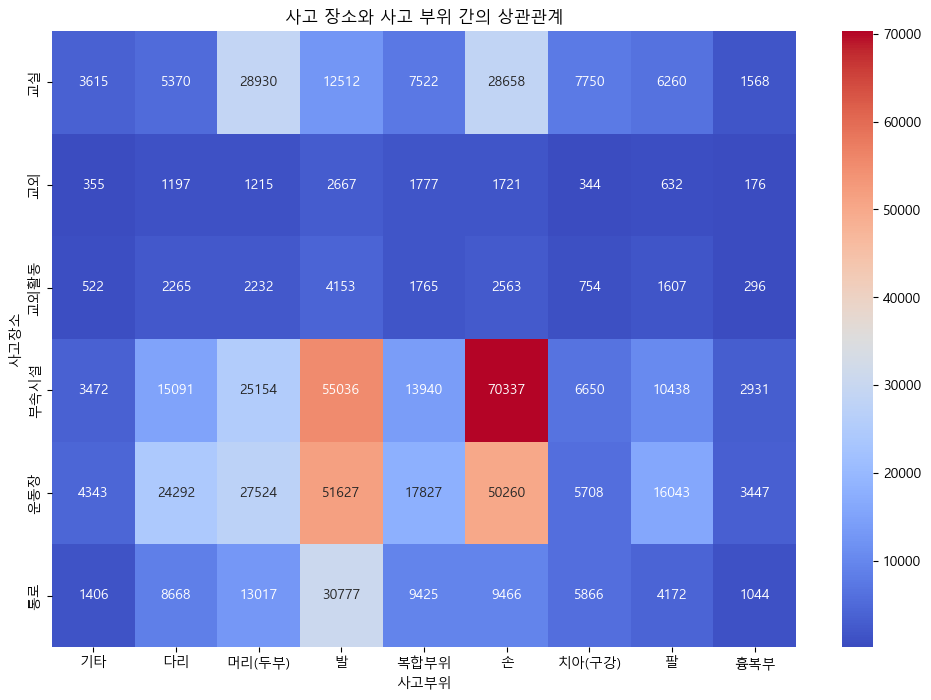

In [30]:
pivot_table = df.pivot_table(values='구분', index='사고장소', columns='사고부위', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('사고 장소와 사고 부위 간의 상관관계')
plt.xlabel('사고부위')
plt.ylabel('사고장소')
plt.show()

## 인력풀 및 개설강의 분석

### 연도별 개설강의와 사고 빈도

In [31]:
working_pool = pd.read_excel("인력풀 지역 라벨링.xlsx")
opened_class = pd.read_excel("개설강의 라벨링&지역 분류.xlsx")

In [32]:
accidents_year = df.groupby('year').size()

#### 개설 강의는 등록일 기준에 의해 연도 할당 

In [33]:
opened_class['연도'] = pd.to_datetime(opened_class['등록일 (수정일)']).dt.year

In [34]:
yearly_counts = opened_class.groupby('연도').size()
yearly_growth = yearly_counts.pct_change() * 100

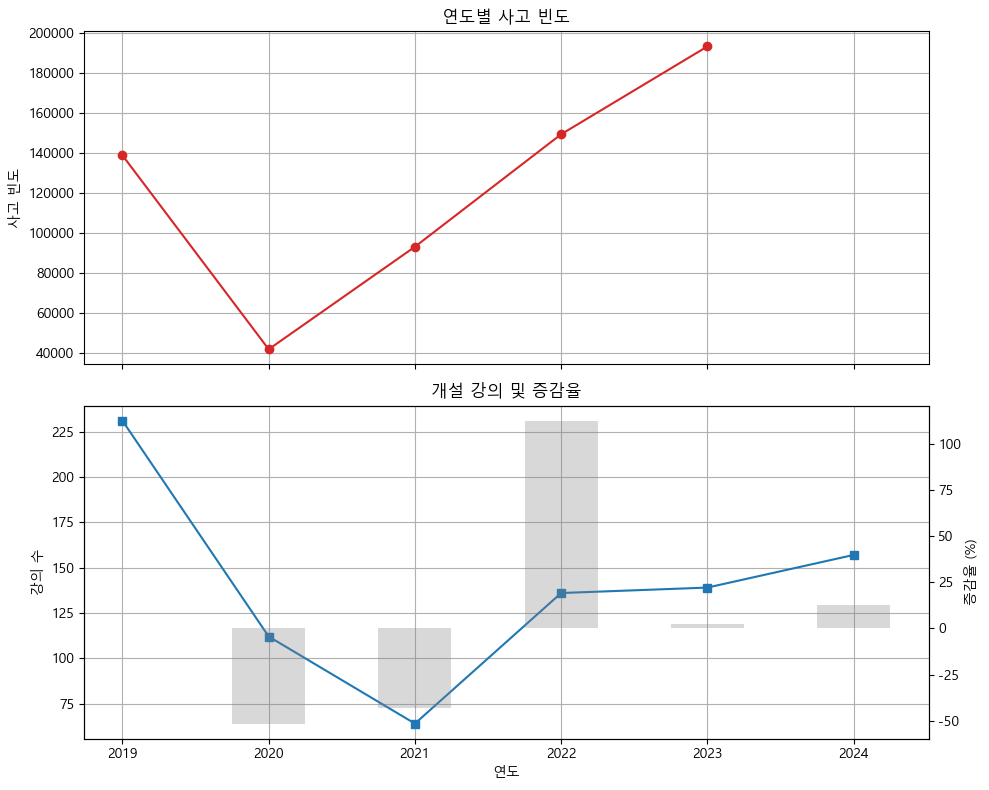

In [35]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

ax1.plot(accidents_year.index, accidents_year, marker='o', linestyle='-', color='tab:red')
ax1.set_title('연도별 사고 빈도')
ax1.set_ylabel('사고 빈도')
ax1.grid(True)

ax2.plot(yearly_counts.index, yearly_counts, marker='s', linestyle='-', color='tab:blue')
ax2.set_title('개설 강의 및 증감율')
ax2.set_xlabel('연도')
ax2.set_ylabel('강의 수')
ax2.grid(True)

ax2b = ax2.twinx()
ax2b.bar(yearly_counts.index, yearly_growth, alpha=0.3, color='gray', width=0.5)
ax2b.set_ylabel('증감율 (%)')

plt.tight_layout()
plt.show()

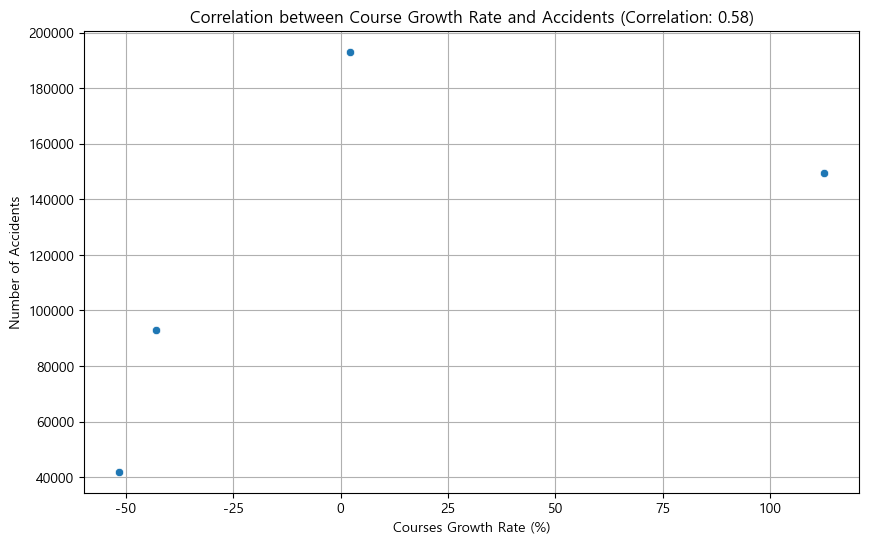

In [36]:
data = pd.DataFrame({
    'Year': yearly_counts.index,
    'Accidents': accidents_year,
    'Courses Growth Rate': yearly_growth
}).dropna()  # 첫 번째 NaN 증감율 제거

correlation = data['Accidents'].corr(data['Courses Growth Rate'])

# 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Courses Growth Rate', y='Accidents', data=data)
plt.title(f'Correlation between Course Growth Rate and Accidents (Correlation: {correlation:.2f})')
plt.xlabel('Courses Growth Rate (%)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

C:\Users\sande\AppData\Local\Temp\ipykernel_11844\3225014456.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(expertise_count.index, rotation=45)
C:\Users\sande\AppData\Local\Temp\ipykernel_11844\3225014456.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(region_count.index, rotation=45)


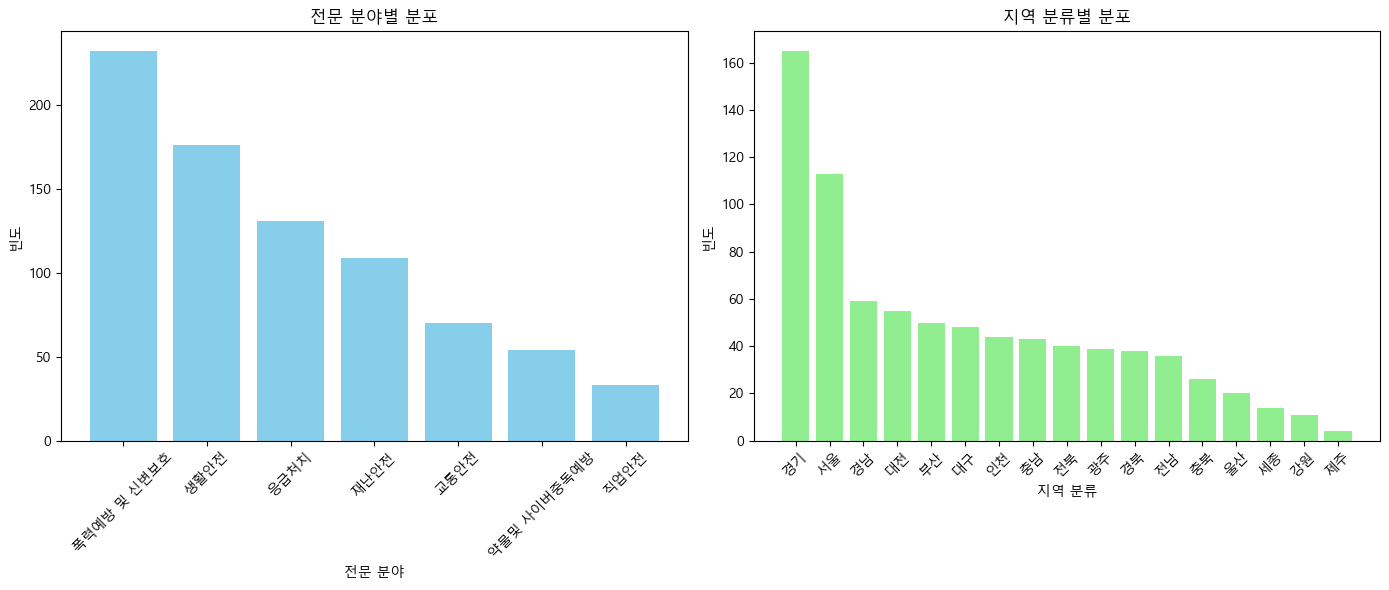

In [37]:
expertise_count = working_pool['전문분야'].value_counts()

region_count = working_pool['지역 분류'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(expertise_count.index, expertise_count.values, color='skyblue')
axes[0].set_title('전문 분야별 분포')
axes[0].set_xlabel('전문 분야')
axes[0].set_ylabel('빈도')
axes[0].set_xticklabels(expertise_count.index, rotation=45)

axes[1].bar(region_count.index, region_count.values, color='lightgreen')
axes[1].set_title('지역 분류별 분포')
axes[1].set_xlabel('지역 분류')
axes[1].set_ylabel('빈도')
axes[1].set_xticklabels(region_count.index, rotation=45)

plt.tight_layout()
plt.show()

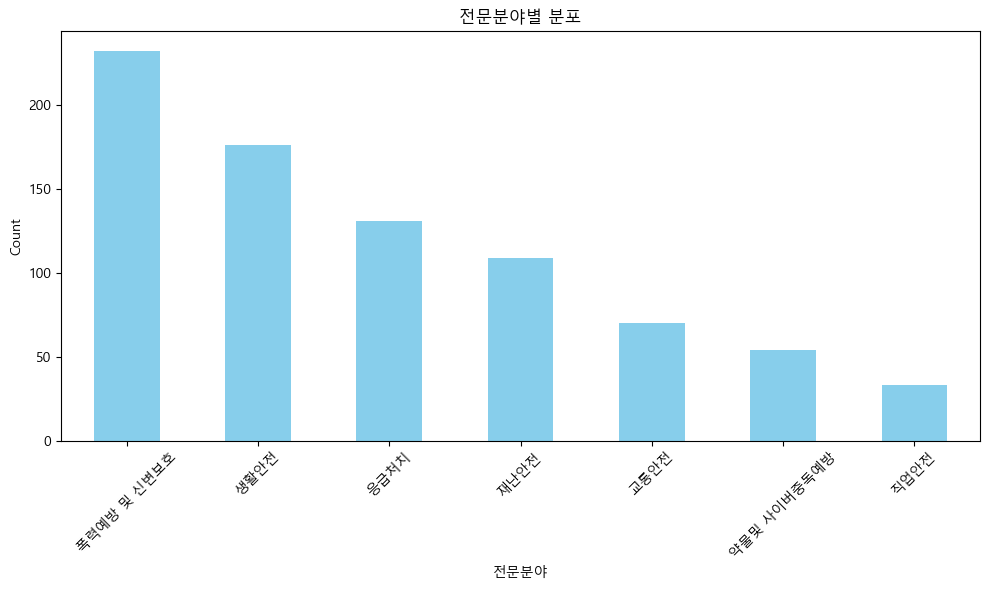

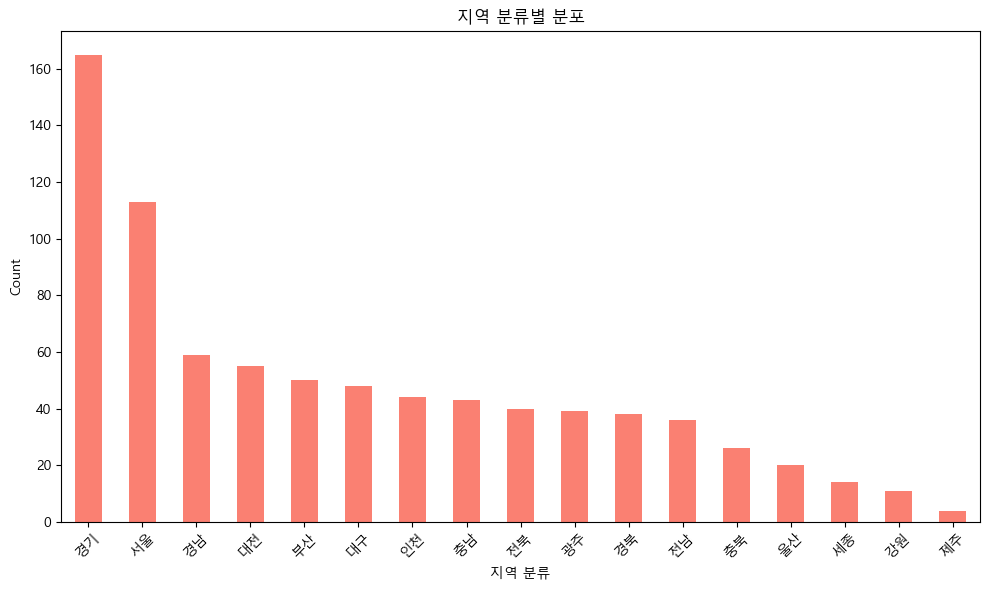

In [38]:
grouped_by_expertise = working_pool['전문분야'].value_counts()
plt.figure(figsize=(10, 6))
grouped_by_expertise.plot(kind='bar', color='skyblue')
plt.title('전문분야별 분포')
plt.xlabel('전문분야')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

grouped_by_region = working_pool['지역 분류'].value_counts()
plt.figure(figsize=(10, 6))
grouped_by_region.plot(kind='bar', color='salmon')
plt.title('지역 분류별 분포')
plt.xlabel('지역 분류')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()